In [1]:
!git clone https://github.com/2301730207Sudhanshu/underground-subway-nox-monitoring-system.git

Cloning into 'underground-subway-nox-monitoring-system'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (18/18), 3.98 MiB | 7.64 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [2]:
import os
os.chdir("underground-subway-nox-monitoring-system")

In [3]:
!pip install numpy pandas matplotlib scikit-learn

In [4]:
import pickle

model = pickle.load(open("nox_rf_model.pkl", "rb"))

print("✅ Model Loaded Successfully")

✅ Model Loaded Successfully


In [5]:
print(model.feature_names_in_)

['no' 'no2' 'relativehumidity' 'temperature' 'wind_direction' 'wind_speed'
 'hour' 'day' 'weekday' 'month']


In [6]:
import numpy as np
import pandas as pd
import time

features = model.feature_names_in_

print("🚇 Real-Time NOx Monitoring Started\n")
print("Model expects features:", features)

while True:

    fake_values = []

    for col in features:

        if col in ["hour"]:
            fake_values.append(np.random.randint(0,24))

        elif col in ["day"]:
            fake_values.append(np.random.randint(1,31))

        elif col in ["weekday"]:
            fake_values.append(np.random.randint(0,7))

        elif col in ["month"]:
            fake_values.append(np.random.randint(1,12))

        else:
            fake_values.append(np.random.uniform(0,200))

    data = pd.DataFrame([fake_values], columns=features)

    prediction = model.predict(data)[0]

    print("\n📡 Sensor Data:")
    print(data)
    print("Prediction:", round(prediction,2))
    print("-"*50)

    time.sleep(3)

🚇 Real-Time NOx Monitoring Started

Model expects features: ['no' 'no2' 'relativehumidity' 'temperature' 'wind_direction' 'wind_speed'
 'hour' 'day' 'weekday' 'month']

📡 Sensor Data:
          no         no2  relativehumidity  temperature  wind_direction  \
0  59.889474  165.344874        193.013917    90.570185      144.265272   

   wind_speed  hour  day  weekday  month  
0   94.726864    14    2        2     10  
Prediction: 0.11
--------------------------------------------------

📡 Sensor Data:
           no        no2  relativehumidity  temperature  wind_direction  \
0  183.099834  84.604127        156.706644   148.291648      132.027033   

   wind_speed  hour  day  weekday  month  
0   54.269692    20   29        4      4  
Prediction: 0.19
--------------------------------------------------

📡 Sensor Data:
           no       no2  relativehumidity  temperature  wind_direction  \
0  163.082833  6.855498         54.968665   181.220741      132.540328   

   wind_speed  hour  day 

KeyboardInterrupt: 

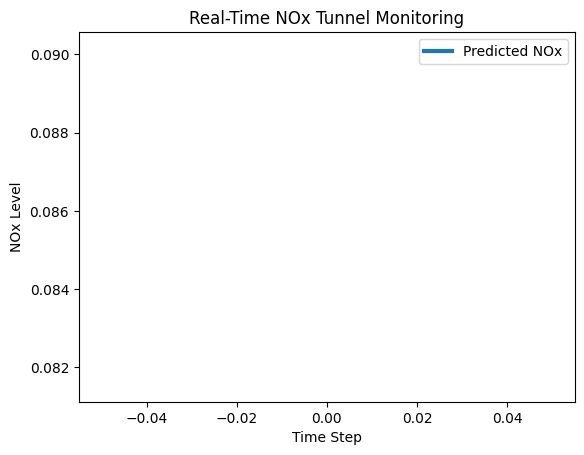

Predicted NOx: 0.09
✅ SAFE LEVEL
----------------------------------------


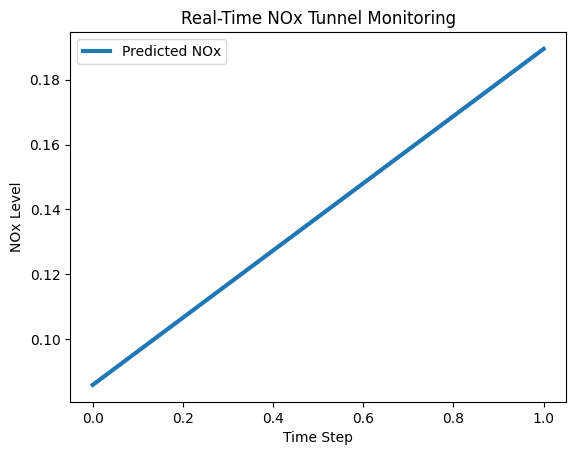

Predicted NOx: 0.19
✅ SAFE LEVEL
----------------------------------------


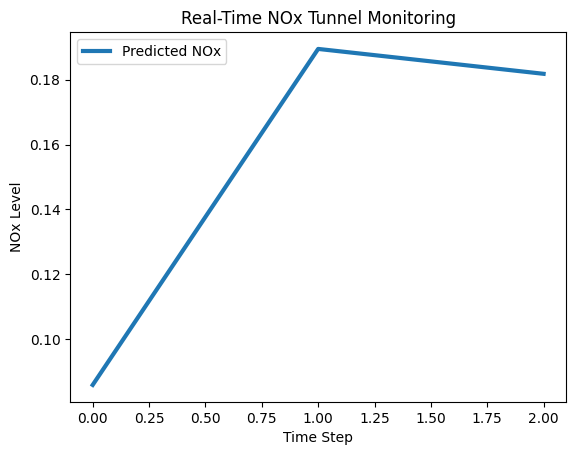

Predicted NOx: 0.18
✅ SAFE LEVEL
----------------------------------------


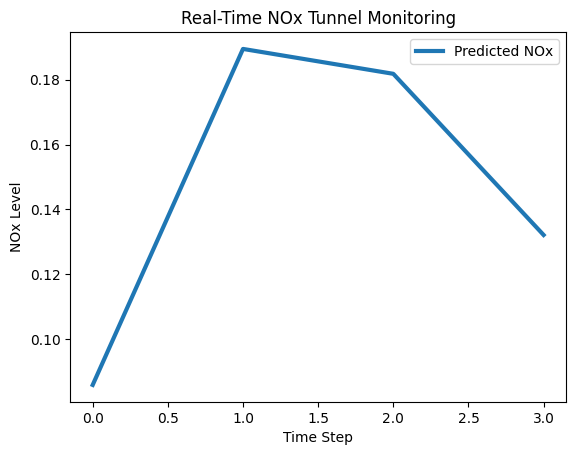

Predicted NOx: 0.13
✅ SAFE LEVEL
----------------------------------------


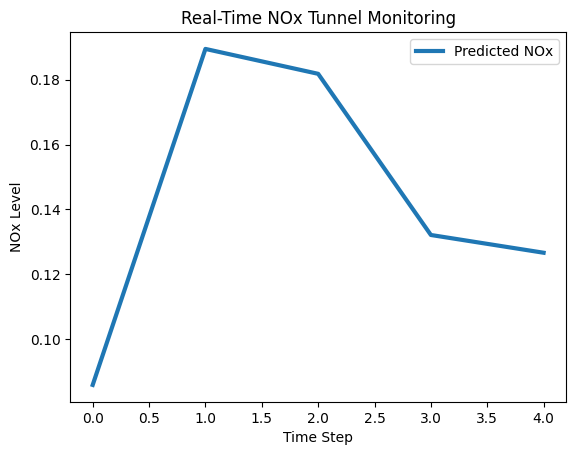

Predicted NOx: 0.13
✅ SAFE LEVEL
----------------------------------------


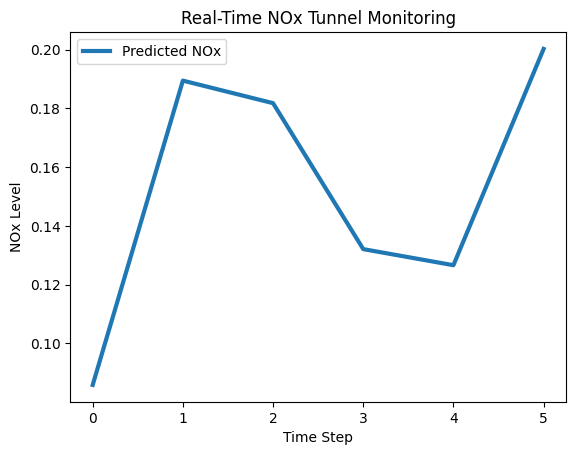

Predicted NOx: 0.2
✅ SAFE LEVEL
----------------------------------------


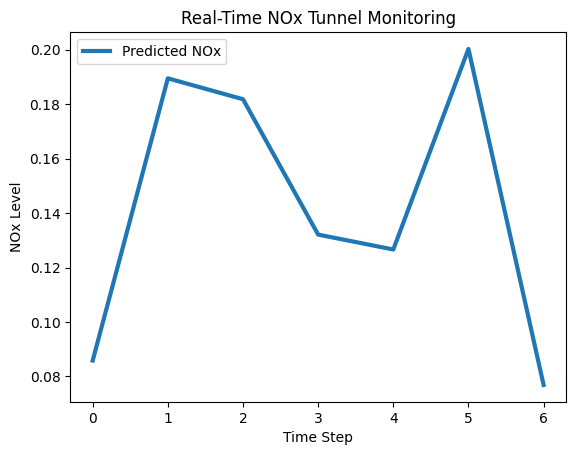

KeyboardInterrupt: 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

features = model.feature_names_in_

nox_values = []
pred_values = []

plt.ion()

for i in range(50):

    fake_values = []

    for col in features:
        if col == "hour":
            val = np.random.randint(0,24)
        elif col == "day":
            val = np.random.randint(1,31)
        elif col == "weekday":
            val = np.random.randint(0,7)
        elif col == "month":
            val = np.random.randint(1,12)
        else:
            val = np.random.uniform(0,200)

        fake_values.append(val)

    data = pd.DataFrame([fake_values], columns=features)

    prediction = model.predict(data)[0]

    # Use predicted value for visualization
    nox_values.append(prediction)
    pred_values.append(prediction)

    plt.clf()
    plt.plot(nox_values, linewidth=3, label="Predicted NOx")
    plt.legend()
    plt.title("Real-Time NOx Tunnel Monitoring")
    plt.xlabel("Time Step")
    plt.ylabel("NOx Level")
    plt.pause(0.5)

    print("Predicted NOx:", round(prediction,2))

    if prediction > 80:
        print("🚨 DANGER: Unsafe NOx Level!")
    elif prediction > 40:
        print("⚠️ WARNING: Moderate Pollution")
    else:
        print("✅ SAFE LEVEL")

    print("-"*40)

    time.sleep(1)

plt.ioff()

In [8]:
import pickle
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [9]:
model = pickle.load(open("nox_rf_model.pkl", "rb"))

print("✅ Model Loaded Successfully")

✅ Model Loaded Successfully


In [10]:
conn = sqlite3.connect("nox_monitoring.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sensor_data (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP,
    predicted_nox REAL
)
""")

conn.commit()

print("✅ SQL Database Ready")

✅ SQL Database Ready


In [11]:
features = model.feature_names_in_

print("🚇 Monitoring Started")

for i in range(50):

    fake_values = []

    scenario = np.random.choice(["safe","warning","danger"], p=[0.6,0.25,0.15])

    for col in features:

        if col in ["hour"]:
            val = np.random.randint(0,24)

        elif col in ["day"]:
            val = np.random.randint(1,31)

        elif col in ["weekday"]:
            val = np.random.randint(0,7)

        elif col in ["month"]:
            val = np.random.randint(1,12)

        else:
            if col == "nox":
                if scenario == "safe":
                    val = np.random.uniform(10,40)
                elif scenario == "warning":
                    val = np.random.uniform(40,80)
                else:
                    val = np.random.uniform(80,200)
            else:
                val = np.random.uniform(0,200)

        fake_values.append(val)

    data = pd.DataFrame([fake_values], columns=features)

    prediction = model.predict(data)[0]

    cursor.execute(
        "INSERT INTO sensor_data(predicted_nox) VALUES(?)",
        (float(prediction),)
    )
    conn.commit()

    print("Saved:", round(prediction,2))

    time.sleep(1)

🚇 Monitoring Started
Saved: 0.17
Saved: 0.16
Saved: 0.14
Saved: 0.17
Saved: 0.19
Saved: 0.17
Saved: 0.13
Saved: 0.12
Saved: 0.05
Saved: 0.08
Saved: 0.19


KeyboardInterrupt: 

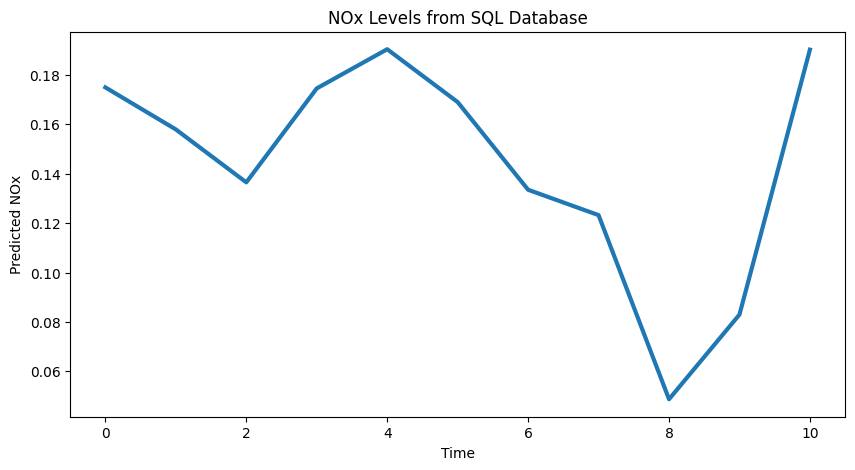

In [12]:
df = pd.read_sql_query("SELECT * FROM sensor_data", conn)

plt.figure(figsize=(10,5))
plt.plot(df["predicted_nox"], linewidth=3)
plt.title("NOx Levels from SQL Database")
plt.xlabel("Time")
plt.ylabel("Predicted NOx")
plt.show()

In [13]:
import os
print(os.path.getsize("nox_rf_model.pkl"))

12727157


In [14]:
import pickle
model = pickle.load(open("nox_rf_model.pkl","rb"))
print("MODEL LOADED SUCCESSFULLY")

MODEL LOADED SUCCESSFULLY


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import sqlite3
from datetime import datetime
import time
import plotly.graph_objects as go

# ---------------- PAGE CONFIG ----------------
st.set_page_config(page_title="AI NOx Control System", layout="wide")

# ---------------- FUTURISTIC STYLE ----------------
st.markdown("""
<style>
body {
    background-color: black;
}
.big-title {
    font-size: 45px;
    font-weight: bold;
    color: cyan;
    text-shadow: 0 0 20px cyan;
}
.safe {color:#00ff9c; font-size:30px;}
.mod {color:orange; font-size:30px;}
.unsafe {color:red; font-size:30px; animation: blink 1s infinite;}

@keyframes blink {
  50% { opacity: 0; }
}
</style>
""", unsafe_allow_html=True)

st.markdown('<p class="big-title">🚇 AI Subway NOx Control Center</p>', unsafe_allow_html=True)

# ---------------- LOAD MODEL ----------------
model = pickle.load(open("nox_rf_model.pkl", "rb"))

# ---------------- DATABASE ----------------
conn = sqlite3.connect("nox_data.db", check_same_thread=False)
c = conn.cursor()

c.execute("""
CREATE TABLE IF NOT EXISTS readings(
time TEXT,
prediction REAL,
status TEXT
)
""")
conn.commit()

# ---------------- SENSOR ENGINE ----------------
def generate_sensor():
    now = datetime.now()
    return {
        "no": np.random.uniform(10,200),
        "no2": np.random.uniform(10,200),
        "relativehumidity": np.random.uniform(30,90),
        "temperature": np.random.uniform(20,50),
        "wind_direction": np.random.uniform(0,360),
        "wind_speed": np.random.uniform(0,10),
        "hour": now.hour,
        "day": now.day,
        "weekday": now.weekday(),
        "month": now.month
    }

# ---------------- STATUS CLASS ----------------
def classify(v):
    if v < 40:
        return "SAFE", "safe"
    elif v < 80:
        return "MODERATE", "mod"
    else:
        return "UNSAFE", "unsafe"

# ---------------- GAUGE FUNCTION ----------------
def gauge(val):
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=val,
        title={'text': "NOx Level"},
        gauge={
            'axis': {'range': [0, 200]},
            'bar': {'color': "cyan"},
            'steps': [
                {'range': [0, 40], 'color': "green"},
                {'range': [40, 80], 'color': "orange"},
                {'range': [80, 200], 'color': "red"}
            ]
        }
    ))
    return fig

# ---------------- GAME LOOP ----------------
placeholder = st.empty()
mission_score = 0

while True:
    with placeholder.container():

        sensor = generate_sensor()
        df_input = pd.DataFrame([sensor])

        prediction = model.predict(df_input)[0]
        status, css = classify(prediction)

        # Save DB
        c.execute("INSERT INTO readings VALUES (?, ?, ?)",
                  (datetime.now(), prediction, status))
        conn.commit()

        # GAME SCORE
        if status == "SAFE":
            mission_score += 1
        else:
            mission_score = max(0, mission_score - 2)

        # LAYOUT
        col1, col2, col3 = st.columns([2,2,1])

        # ---------------- SENSOR PANEL ----------------
        with col1:
            st.subheader("🛰 LIVE SENSOR FEED")
            st.dataframe(pd.DataFrame(sensor.items(),
                         columns=["Sensor","Value"]))

            hist = pd.read_sql("SELECT * FROM readings ORDER BY time DESC LIMIT 50", conn)
            st.line_chart(hist["prediction"])

        # ---------------- GAUGE PANEL ----------------
        with col2:
            st.subheader("🎯 AI THREAT ANALYZER")
            st.plotly_chart(gauge(prediction), use_container_width=True)

            st.markdown(f"<h2 class='{css}'>{status}</h2>", unsafe_allow_html=True)

        # ---------------- GAME PANEL ----------------
        with col3:
            st.subheader("🎮 SYSTEM GAME MODE")

            st.metric("Mission Score", mission_score)
            st.metric("AI Threat Level", int(prediction))

            if status == "UNSAFE":
                st.error("🚨 DANGER ZONE")

            if mission_score > 20:
                st.success("🏆 LEVEL UP: SYSTEM STABLE")

    time.sleep(3)

Overwriting app.py


In [22]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import sqlite3
from datetime import datetime
import plotly.graph_objects as go
import time

# ---------------- PAGE CONFIG ----------------
st.set_page_config(page_title="AI NOx Control System", layout="wide")

# ---------------- CYBERPUNK UI ----------------
st.markdown("""
<style>
body {background:#020617;}
.title {
    text-align:center;
    font-size:50px;
    color:#00eaff;
    text-shadow:0 0 30px cyan;
    font-weight:bold;
}
.panel {
    background:#0f172a;
    border-radius:20px;
    padding:20px;
    box-shadow:0 0 25px rgba(0,255,255,0.3);
}
.safe {color:#00ff9c;font-size:35px;}
.mod {color:#ffae00;font-size:35px;}
.unsafe {
    color:red;font-size:35px;
    animation:blink 1s infinite;
}
@keyframes blink {50%{opacity:0;}}
</style>
""", unsafe_allow_html=True)

st.markdown("<div class='title'>🚇 AI NOx Command Center</div>", unsafe_allow_html=True)

# ---------------- LOAD MODEL ----------------
model = pickle.load(open("nox_rf_model.pkl", "rb"))

# ---------------- DATABASE ----------------
conn = sqlite3.connect("nox_data.db", check_same_thread=False)
c = conn.cursor()

c.execute("""
CREATE TABLE IF NOT EXISTS readings(
time TEXT,
prediction REAL,
status TEXT
)
""")
conn.commit()

# ---------------- SENSOR SIMULATION (10 FEATURES) ----------------
def generate_sensor():
    now = datetime.now()
    return {
        "no": np.random.uniform(10,200),
        "no2": np.random.uniform(10,200),
        "relativehumidity": np.random.uniform(30,90),
        "temperature": np.random.uniform(20,50),
        "wind_direction": np.random.uniform(0,360),
        "wind_speed": np.random.uniform(0,10),
        "hour": now.hour,
        "day": now.day,
        "weekday": now.weekday(),
        "month": now.month
    }

# ---------------- STATUS CLASSIFIER ----------------
def classify(v):
    if v < 40:
        return "SAFE","safe"
    elif v < 80:
        return "MODERATE","mod"
    else:
        return "UNSAFE","unsafe"

# ---------------- FUTURISTIC GAUGE ----------------
def gauge(val):
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=val,
        title={'text':"NOx Level"},
        gauge={
            'axis':{'range':[0,200]},
            'bar':{'color':"#00eaff"},
            'steps':[
                {'range':[0,40],'color':"#00ff9c"},
                {'range':[40,80],'color':"#ffae00"},
                {'range':[80,200],'color':"#ff003c"}
            ]
        }
    ))
    fig.update_layout(paper_bgcolor="#020617",font_color="white")
    return fig

# ---------------- SESSION SCORE ----------------
if "score" not in st.session_state:
    st.session_state.score = 0

# ---------------- GENERATE DATA ----------------
sensor = generate_sensor()
df = pd.DataFrame([sensor])

prediction = model.predict(df)[0]
status, css = classify(prediction)

# SAVE DATA
c.execute("INSERT INTO readings VALUES (?,?,?)",
          (datetime.now(), prediction, status))
conn.commit()

# GAME SCORE
if status=="SAFE":
    st.session_state.score += 1
else:
    st.session_state.score = max(0, st.session_state.score-2)

# ---------------- LAYOUT ----------------
col1,col2,col3 = st.columns([2,2,1])

# ---------------- SENSOR PANEL ----------------
with col1:
    st.markdown("<div class='panel'>", unsafe_allow_html=True)
    st.subheader("🛰 LIVE SENSOR MATRIX")

    st.dataframe(df.T.rename(columns={0:"Value"}))

    hist = pd.read_sql("SELECT * FROM readings ORDER BY time DESC LIMIT 50",conn)

    fig = go.Figure()
    fig.add_trace(go.Scatter(
        y=hist["prediction"],
        mode="lines",
        line=dict(color="#00eaff",width=3)
    ))
    fig.update_layout(
        title="Emission Trend",
        paper_bgcolor="#020617",
        plot_bgcolor="#020617",
        font_color="white"
    )
    st.plotly_chart(fig,use_container_width=True)
    st.markdown("</div>", unsafe_allow_html=True)

# ---------------- AI CORE PANEL ----------------
with col2:
    st.markdown("<div class='panel'>", unsafe_allow_html=True)
    st.subheader("🤖 AI Threat Analyzer")

    st.plotly_chart(gauge(prediction),use_container_width=True)

    st.markdown(f"<center><div class='{css}'>{status}</div></center>", unsafe_allow_html=True)
    st.markdown("</div>", unsafe_allow_html=True)

# ---------------- GAME PANEL ----------------
with col3:
    st.markdown("<div class='panel'>", unsafe_allow_html=True)
    st.subheader("🎮 SYSTEM STATUS")

    st.metric("Mission Score", st.session_state.score)
    st.metric("NOx Index", int(prediction))

    if status=="UNSAFE":
        st.error("🚨 DANGER ZONE")

    if st.session_state.score>20:
        st.success("🏆 SYSTEM STABLE")

    st.markdown("</div>", unsafe_allow_html=True)

# ---------------- AUTO REFRESH ----------------
time.sleep(3)
st.rerun()

Overwriting app.py


In [34]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import sqlite3
from datetime import datetime
import time

# ---------------- CONFIG ----------------
st.set_page_config(page_title="NOx AI Control Center", layout="wide")

st.markdown("""
<style>
.big-font {font-size:40px !important; font-weight:700;}
.status-safe {color: #00ff9c; font-weight:bold;}
.status-mod {color: orange; font-weight:bold;}
.status-unsafe {color: red; font-weight:bold;}
</style>
""", unsafe_allow_html=True)

st.markdown('<p class="big-font">⚡ AI NOx Control Center</p>', unsafe_allow_html=True)

# ---------------- LOAD MODEL ----------------
model = pickle.load(open("nox_rf_model.pkl", "rb"))

# ---------------- DATABASE ----------------
conn = sqlite3.connect("nox_data.db", check_same_thread=False)
c = conn.cursor()

c.execute("""
CREATE TABLE IF NOT EXISTS readings(
time TEXT,
prediction REAL,
status TEXT
)
""")
conn.commit()

# ---------------- SENSOR ENGINE ----------------
def generate_sensor_data():
    now = datetime.now()

    data = {
        "no": np.random.uniform(10,200),
        "no2": np.random.uniform(10,200),
        "relativehumidity": np.random.uniform(30,90),
        "temperature": np.random.uniform(20,50),
        "wind_direction": np.random.uniform(0,360),
        "wind_speed": np.random.uniform(0,10),
        "hour": now.hour,
        "day": now.day,
        "weekday": now.weekday(),
        "month": now.month
    }

    return data

# ---------------- CLASSIFICATION ----------------
def classify(val):
    if val < 40:
        return "SAFE", "status-safe"
    elif val < 80:
        return "MODERATE", "status-mod"
    else:
        return "UNSAFE", "status-unsafe"

# ---------------- LIVE LOOP ----------------
placeholder = st.empty()

while True:
    with placeholder.container():

        # Generate sensors
        sensor = generate_sensor_data()
        df_input = pd.DataFrame([sensor])

        # Model prediction
        prediction = model.predict(df_input)[0]
        status, css = classify(prediction)

        # Save to DB
        c.execute("INSERT INTO readings VALUES (?, ?, ?)",
                  (datetime.now(), prediction, status))
        conn.commit()

        # ================= DASHBOARD LAYOUT =================
        col1, col2 = st.columns([2,1])

        # ---------------- LEFT PANEL ----------------
        with col1:

            st.subheader("🎮 Sensor Control Panel")

            sensor_df = pd.DataFrame(sensor.items(), columns=["Sensor", "Value"])
            st.dataframe(sensor_df, use_container_width=True)

            st.subheader("📈 Live NOx Trend")

            hist = pd.read_sql("SELECT * FROM readings ORDER BY time DESC LIMIT 100", conn)
            st.line_chart(hist["prediction"])

        # ---------------- RIGHT PANEL ----------------
        with col2:

            st.subheader("🤖 AI Decision Engine")

            st.metric("Predicted NOx", f"{prediction:.2f}")

            st.markdown(f"<h2 class='{css}'>{status}</h2>", unsafe_allow_html=True)

            if status == "UNSAFE":
                st.error("🚨 CRITICAL POLLUTION ALERT")
            elif status == "MODERATE":
                st.warning("⚠ MODERATE POLLUTION")

            st.subheader("📊 System Stats")

            avg = hist["prediction"].mean()
            max_val = hist["prediction"].max()

            st.metric("Average NOx", f"{avg:.2f}")
            st.metric("Peak NOx", f"{max_val:.2f}")

    time.sleep(3)

Overwriting app.py


In [29]:
!pip install streamlit streamlit-autorefresh pyngrok

In [35]:
!streamlit run app.py &>/dev/null &

In [36]:
from pyngrok import ngrok
ngrok.set_auth_token("39tSykpO6Rim7zoJ475g6ndbV3Q_3HQ5es53CxQyVvwYy5wEp")

In [37]:
!streamlit run app.py &>/dev/null &

In [38]:
from pyngrok import ngrok
print(ngrok.connect(8501))

NgrokTunnel: "https://irretraceably-unsterilized-conner.ngrok-free.dev" -> "http://localhost:8501"


In [39]:
!pkill -f streamlit
!pkill -f ngrok